<a href="https://colab.research.google.com/github/kkkkaty/MOAD/blob/main/%D0%BC%D0%BE%D0%B0%D0%B41.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0.Описать задачу словами

Описание датасета: датасет представляет собой информацию о контенте платформы Netflix, содержащую 8807 записей о различных фильмах и сериалах. Каждая запись включает в себя 12 ключевых характеристик, которые описывают медиапродукт. Этот датасет представляет ценность для анализа контентной стратегии Netflix, построения рекомендательных систем, исследования рыночных трендов и создания моделей машинного обучения для классификации и прогнозирования популярности контента.

Описание задачи: эта работа представляет собой проект по анализу данных Netflix и построению моделей машинного обучения для классификации контента. Основной задачей является прогнозирование категорий контента Netflix на основе различных характеристик фильмов и сериалов.

1.Прочитать данные

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.metrics import classification_report, accuracy_score, f1_score, adjusted_rand_score, confusion_matrix, normalized_mutual_info_score
from scipy.sparse import hstack
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MultiLabelBinarizer, StandardScaler


In [141]:
import kagglehub
import pandas as pd
import os

path = kagglehub.dataset_download("shivamb/netflix-shows")

file_path = path + "/netflix_titles.csv"
data_raw = pd.read_csv(file_path)

Using Colab cache for faster access to the 'netflix-shows' dataset.


In [142]:
data_raw

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [143]:
data_raw.shape

(8807, 12)

In [144]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


2. Разбить данные на обучающую и тестовую выборки

In [145]:
# Определяем 10 самых популярных жанров для фильтрации данных
top_genres_count = 10

# Создаем колонку с первым жанром из списка
data_raw['primary_genre'] = data_raw['listed_in'].apply(
    lambda x: x.split(',')[0].strip()
)

# Подсчитываем частоту встречаемости жанров и выбираем топ-N
genre_counts = data_raw['primary_genre'].value_counts()
common_genres = genre_counts.head(top_genres_count).index

# Фильтруем данные, оставляя только записи с популярными жанрами
data_filtered = data_raw[data_raw['primary_genre'].isin(common_genres)]

# Подготавливаем признаки (X) и целевую переменную (y)
# Удаляем ненужные для моделирования колонки
columns_to_drop = ['primary_genre', 'listed_in', 'date_added', 'show_id']
X = data_filtered.drop(columns=columns_to_drop)
y = data_filtered['primary_genre']

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

# Получаем размеры выборок
N_train = X_train.shape[0]
N_test = X_test.shape[0]

print(f"Размер обучающей выборки: {N_train}")
print(f"Размер тестовой выборки: {N_test}")
print(f"Общий размер данных после фильтрации: {N_train + N_test}")

Размер обучающей выборки: 5454
Размер тестовой выборки: 1819
Общий размер данных после фильтрации: 7273


3. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.

Основные статистики для release_year:
count    8807.000000
mean     2014.180198
std         8.819312
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64

Дополнительная информация:
Общее количество записей: 8807
Средний год: 2014.1801975701146
Стандартное отклонение: 8.819312130834057
Минимальный год: 1925
Максимальный год: 2021
Медиана: 2017.0


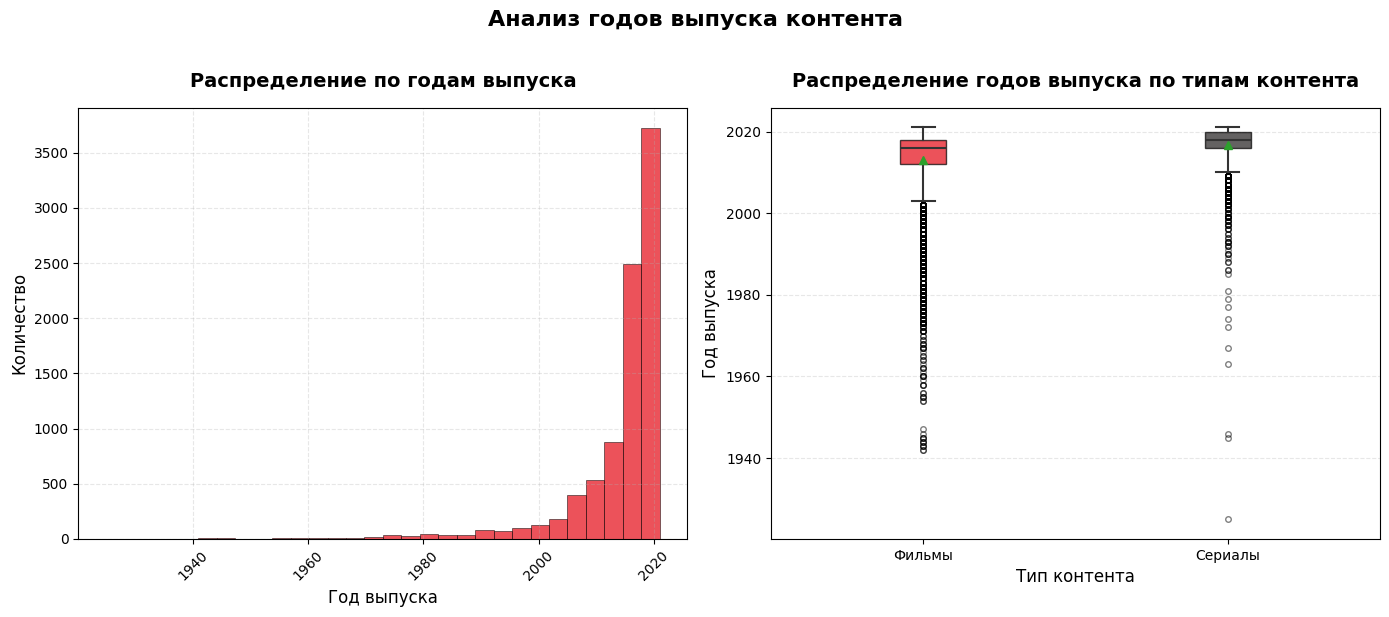


Movie:
  Количество: 6131
  Средний год: 2013.1
  Медианный год: 2016.0
  Диапазон: 1942 - 2021

TV Show:
  Количество: 2676
  Средний год: 2016.6
  Медианный год: 2018.0
  Диапазон: 1925 - 2021


In [146]:
# Создаем копию данных для анализа
data = data_raw.copy()

# Выводим основные статистики для release_year
print("Основные статистики для release_year:")
release_year_stats = data['release_year'].describe()
print(release_year_stats)
print()

# Дополнительная информация о распределении
print("Дополнительная информация:")
print(f"Общее количество записей: {len(data)}")
print(f"Средний год: {data['release_year'].mean()}")
print(f"Стандартное отклонение: {data['release_year'].std()}")
print(f"Минимальный год: {data['release_year'].min()}")
print(f"Максимальный год: {data['release_year'].max()}")
print(f"Медиана: {data['release_year'].median()}")


# Создаем фигуру с двумя графиками
plt.figure(figsize=(14, 6))

# 1. Гистограмма распределения годов выпуска
plt.subplot(1, 2, 1)
plt.hist(data['release_year'].dropna(),
         bins=30,
         color='#E50914',
         alpha=0.7,
         edgecolor='black',
         linewidth=0.5)
plt.title('Распределение по годам выпуска',
          fontsize=14,
          fontweight='bold',
          pad=15)
plt.xlabel('Год выпуска', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(rotation=45)

# 2. Боксплот для release_year по типам контента
plt.subplot(1, 2, 2)

# Подготовка данных для боксплота
movie_data = data[data['type'] == 'Movie']['release_year']
tv_show_data = data[data['type'] == 'TV Show']['release_year']

# Рисуем боксплоты
boxplot_data = [movie_data.dropna(), tv_show_data.dropna()]
box = plt.boxplot(boxplot_data,
                 patch_artist=True,
                 tick_labels=['Фильмы', 'Сериалы'],
                 showmeans=True)

# Настраиваем внешний вид боксплотов
colors = ['#E50914', '#221F1F']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Настройка других элементов боксплота
for element in ['whiskers', 'caps', 'medians']:
    for line in box[element]:
        line.set_color('#333333')
        line.set_linewidth(1.5)

for flier in box['fliers']:
    flier.set(marker='o',
              color='#333333',
              alpha=0.5,
              markersize=4)

plt.title('Распределение годов выпуска по типам контента',
          fontsize=14,
          fontweight='bold',
          pad=15)
plt.xlabel('Тип контента', fontsize=12)
plt.ylabel('Год выпуска', fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--', axis='y')

plt.suptitle('Анализ годов выпуска контента',
             fontsize=16,
             fontweight='bold',
             y=1.02)
plt.tight_layout()
plt.show()

# Дополнительный анализ
for content_type in data['type'].unique():
    type_data = data[data['type'] == content_type]['release_year']
    print(f"\n{content_type}:")
    print(f"  Количество: {len(type_data)}")
    print(f"  Средний год: {type_data.mean():.1f}")
    print(f"  Медианный год: {type_data.median():.1f}")
    print(f"  Диапазон: {type_data.min()} - {type_data.max()}")

Наибольшее количество контента выпущено около 2019-2020 годов

Резкий рост производства начался примерно с 2000-х годов

До 1990-х годов выпускалось очень мало контента


Данные показывают, что платформа в основном содержит современный контент, выпущенный в последние 5-10 лет, что характерно для стриминговых сервисов.

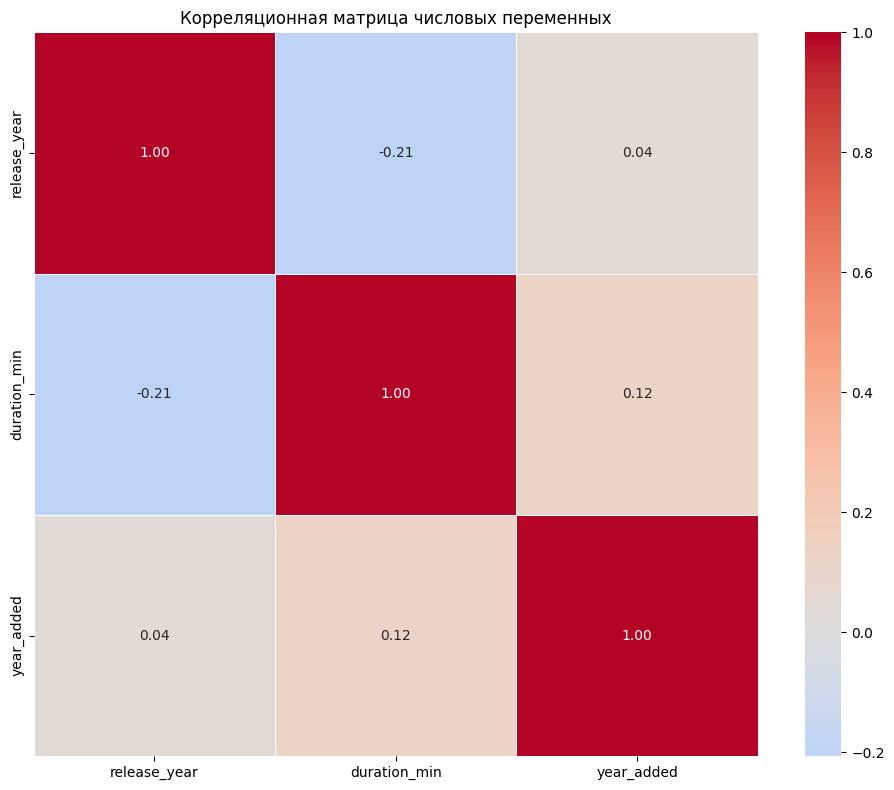

In [147]:
# Преобразуем данные для корреляционного анализа
# Для фильмов извлекаем продолжительность в минутах
movies = data_raw[data_raw['type'] == 'Movie'].copy()
movies['duration_min'] = movies['duration'].str.extract(r'(\d+)').astype(float)

# Извлекаем год добавления из даты
data_raw['date_added'] = pd.to_datetime(data_raw['date_added'], errors='coerce')
data_raw['year_added'] = data_raw['date_added'].dt.year

# Создаем DataFrame с числовыми переменными
numeric_data = pd.DataFrame()
numeric_data['release_year'] = data_raw['release_year']
numeric_data['duration_min'] = movies['duration_min']
numeric_data['year_added'] = data_raw['year_added']

# Удаляем строки с пропущенными значениями
numeric_data = numeric_data.dropna()

# Строим корреляционную матрицу
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_data.corr()

sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            fmt='.2f',
            linewidths=0.5)

plt.title("Корреляционная матрица числовых переменных")
plt.tight_layout()
plt.show()

Более новые фильмы имеют небольшую тенденцию к меньшей продолжительности
В среднем современные фильмы немного короче старых

Продолжительность фильмов практически не зависит от года выпуска и других анализируемых факторов

Нет четкого тренда в изменении продолжительности фильмов со временем

Продолжительность - относительно стабильная характеристика, не подверженная сильным временным изменениям

Netflix придерживаются устоявшихся форматов по длительности


4. Обработать пропущенные значения

In [148]:
X_train.isnull().sum()

,0
type,0
title,0
director,1190
cast,435
country,503
release_year,0
rating,2
duration,0
description,0


In [149]:
# Заполняем пропущенные значения в указанных столбцах
columns_to_fill = ['director', 'cast', 'country', 'rating', 'duration']

for column in columns_to_fill:
    X_train[column] = X_train[column].fillna('unknown')
    X_test[column] = X_test[column].fillna('unknown')

# Проверяем результат
print("После обработки пропусков:")
print(X_train.isnull().sum())

После обработки пропусков:
type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        0
description     0
dtype: int64


5. Обработать категориальные признаки

In [150]:
# Преобразуем категориальные переменные в тип category
X_train['type'] = X_train['type'].astype('category')
X_train['rating'] = X_train['rating'].astype('category')
X_test['type'] = X_test['type'].astype('category')
X_test['rating'] = X_test['rating'].astype('category')

from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer

# OneHotEncoder для бинарных/категориальных признаков
enc = OneHotEncoder(drop='if_binary', sparse_output=False)
enc.fit(X_train[['type', 'rating']])

OneHotEncoder(drop='if_binary', sparse_output=False)

In [151]:
# Преобразуем обучающую выборку
dummies_train = pd.DataFrame(
    enc.transform(X_train[['type', 'rating']]),
    columns=enc.get_feature_names_out(),
    index=X_train.index
)

# Обработка стран с MultiLabelBinarizer
countries_split_train = X_train['country'].str.split(',').apply(
    lambda x: [item.strip() for item in x] if isinstance(x, list) else []
)

mlb = MultiLabelBinarizer()
country_encoded_train = mlb.fit_transform(countries_split_train)

country_df_train = pd.DataFrame(
    country_encoded_train,
    columns=mlb.classes_,
    index=X_train.index
)
country_df_train = country_df_train.add_prefix('country_')

# Объединяем все фичи
dummies_train = pd.concat([dummies_train, country_df_train], axis=1)

dummies_train.head()


,type_TV Show,rating_G,rating_NC-17,rating_NR,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,...,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Vatican City,country_Venezuela,country_Vietnam,country_West Germany,country_Zimbabwe,country_unknown
5633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5465,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
8234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
X_train = pd.concat([X_train, dummies_train], axis=1)

X_train = X_train.drop(['type', 'rating', 'country'], axis=1, errors='ignore')

print(f"Размер X_train после обработки: {X_train.shape}")

Размер X_train после обработки: (5454, 129)


In [153]:
X_train.head()

,title,director,cast,release_year,duration,description,type_TV Show,rating_G,rating_NC-17,rating_NR,...,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Vatican City,country_Venezuela,country_Vietnam,country_West Germany,country_Zimbabwe,country_unknown
5633,Sarajevo,Andreas Prochaska,"Florian Teichtmeister, Heino Ferch, Melika For...",2014,98 min,Tasked with unraveling the assassination of Ar...,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5465,The Dream Job,unknown,"Hugo Ng, Shaun Chen, Jeanette Aw, Rebecca Lim,...",2016,1 Season,"A mysterious, wealthy man offers three people ...",1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3625,No One Will Ever Know,Jesús Torres Torres,"Adriana Paz, Jorge A. Jiménez, David Medel, Ar...",2017,102 min,A mother and young son escape into their own i...,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
8234,The Cakemaker,Ofir Raul Graizer,"Sarah Adler, Tim Kalkhof, Roy Miller, Zohar Sh...",2017,109 min,When a German baker travels to Jerusalem in se...,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1975,Santa Banta Pvt Ltd,Akashdeep,"Boman Irani, Vir Das, Neha Dhupia, Lisa Haydon...",2016,111 min,"Passed off as spies, two inept pals are sent t...",0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


6. Провести нормализацию.
Standardization (Z-score Normalization)

In [154]:
# Нормализация числовых признаков
features_to_scale = ['release_year']

# Создаем копию данных
data_normalized = data_raw.copy()

# Масштабируем признаки
scaler = StandardScaler()
data_normalized[features_to_scale] = scaler.fit_transform(data_normalized[features_to_scale])

# Выводим результаты
print("Исходные данные (первые 10 значений):")
print(data_raw[features_to_scale].head(10))

print("\nНормализованные данные (первые 10 значений):")
print(data_normalized[features_to_scale].head(10))

# Дополнительная информация
print(f"\nСреднее значение release_year до нормализации: {data_raw['release_year'].mean():.2f}")
print(f"Стандартное отклонение release_year до нормализации: {data_raw['release_year'].std():.2f}")
print(f"Среднее значение release_year после нормализации: {data_normalized['release_year'].mean():.2f}")
print(f"Стандартное отклонение release_year после нормализации: {data_normalized['release_year'].std():.2f}")

Исходные данные (первые 10 значений):
   release_year
0          2020
1          2021
2          2021
3          2021
4          2021
5          2021
6          2021
7          1993
8          2021
9          2021

Нормализованные данные (первые 10 значений):
   release_year
0      0.659930
1      0.773324
2      0.773324
3      0.773324
4      0.773324
5      0.773324
6      0.773324
7     -2.401707
8      0.773324
9      0.773324

Среднее значение release_year до нормализации: 2014.18
Стандартное отклонение release_year до нормализации: 8.82
Среднее значение release_year после нормализации: 0.00
Стандартное отклонение release_year после нормализации: 1.00


7-8. Метод RandomForest. Вычислить ошибки на обучающей и тестовой выборках. Напечатать матрицы рассогласования. Прокомментировать.

Random Forest отлично работает со смешанными типами данных без необходимости сложного масштабирования. Также хорошо работает со сложными взаимосвями между признаками.

В данных Netflix присутствуют: пропущенные значения; разнородные форматы данных; "шумные" текстовые описания. RF отлично с этим справляется

In [155]:
# Проверяем наличие колонок для кодирования
if all(col in X_test.columns for col in ['type', 'rating', 'country']):
    # One-hot кодирование для type и rating
    test_type_rating_encoded = pd.DataFrame(
        enc.transform(X_test[['type', 'rating']]),
        columns=enc.get_feature_names_out(),
        index=X_test.index
    )

    # MultiLabel кодирование для стран
    test_countries = X_test['country'].str.split(',').apply(
        lambda x: [s.strip() for s in x] if isinstance(x, list) else []
    )
    test_countries_encoded = mlb.transform(test_countries)
    test_countries_df = pd.DataFrame(
        test_countries_encoded,
        columns=[f'country_{c}' for c in mlb.classes_],
        index=X_test.index
    )

    # Объединяем закодированные признаки
    test_encoded = pd.concat([test_type_rating_encoded, test_countries_df], axis=1)

    # Добавляем к тестовым данным и удаляем исходные категориальные колонки
    X_test = pd.concat([X_test, test_encoded], axis=1)
    X_test = X_test.drop(['type', 'rating', 'country'], axis=1)

# Создаем текстовые фичи из нескольких колонок
text_cols = ['description', 'title', 'director', 'cast', 'duration']

X_train['combined_text'] = ''
X_test['combined_text'] = ''

for col in text_cols:
    X_train['combined_text'] += X_train[col].fillna('') + ' '
    X_test['combined_text'] += X_test[col].fillna('') + ' '

# Векторизация текста с TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train['combined_text'])
X_test_tfidf = vectorizer.transform(X_test['combined_text'])

# Снижение размерности
dim_reducer = TruncatedSVD(n_components=150, random_state=42)
X_train_reduced = dim_reducer.fit_transform(X_train_tfidf)
X_test_reduced = dim_reducer.transform(X_test_tfidf)

# Удаляем текстовые колонки
for col in text_cols + ['combined_text']:
    if col in X_train.columns:
        X_train = X_train.drop(col, axis=1)
    if col in X_test.columns:
        X_test = X_test.drop(col, axis=1)

# Масштабируем год выпуска
scaler = StandardScaler()
X_train_year = scaler.fit_transform(X_train[['release_year']])
X_test_year = scaler.transform(X_test[['release_year']])

# Объединяем все признаки
X_train_combined = np.hstack([
    X_train_reduced,
    X_train.drop('release_year', axis=1).values,
    X_train_year
])
X_test_combined = np.hstack([
    X_test_reduced,
    X_test.drop('release_year', axis=1).values,
    X_test_year
])

# Преобразуем в DataFrame
X_train_final = pd.DataFrame(X_train_combined)
X_test_final = pd.DataFrame(X_test_combined)

# Обеспечиваем одинаковые признаки в train и test
shared_features = X_train_final.columns.intersection(X_test_final.columns)
X_train_final = X_train_final[shared_features]
X_test_final = X_test_final[shared_features]

print(f"Обучающая выборка: {X_train_final.shape}")
print(f"Тестовая выборка: {X_test_final.shape}")
print(f"Общие признаки: {len(shared_features)}")

# Обучение модели
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)

model.fit(X_train_final, y_train)

# Прогнозы
train_predictions = model.predict(X_train_final)
test_predictions = model.predict(X_test_final)

# Оценка качества
print("\n=== Результаты на обучающей выборке ===")
print(f"Accuracy: {accuracy_score(y_train, train_predictions):.4f}")
print(f"F1-score (macro): {f1_score(y_train, train_predictions, average='macro'):.4f}")

print("\n=== Результаты на тестовой выборке ===")
print(f"Accuracy: {accuracy_score(y_test, test_predictions):.4f}")
print(f"F1-score (macro): {f1_score(y_test, test_predictions, average='macro'):.4f}")

print("\n=== Детальный отчет (тестовая выборка) ===")
print(classification_report(y_test, test_predictions, zero_division=0))

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:909: UserWarning: unknown class(es) ['Angola', 'Bahamas', 'Bermuda', 'Cayman Islands', 'East Germany', 'Ecuador', 'Lithuania', 'Malawi', 'Mozambique', 'Namibia', 'Puerto Rico', 'Somalia', 'Sri Lanka', 'Sudan', 'Uganda'] will be ignored
  warnings.warn(


Обучающая выборка: (5454, 274)
Тестовая выборка: (1819, 274)
Общие признаки: 274

=== Результаты на обучающей выборке ===
Accuracy: 0.9998
F1-score (macro): 0.9999

=== Результаты на тестовой выборке ===
Accuracy: 0.6476
F1-score (macro): 0.6603

=== Детальный отчет (тестовая выборка) ===
                          precision    recall  f1-score   support

      Action & Adventure       0.58      0.49      0.53       215
Children & Family Movies       0.86      0.79      0.82       151
                Comedies       0.48      0.34      0.39       303
          Crime TV Shows       0.90      0.45      0.60       100
           Documentaries       0.85      0.84      0.85       207
                  Dramas       0.46      0.69      0.55       400
           Horror Movies       0.88      0.10      0.18        69
  International TV Shows       0.75      0.97      0.84       194
                Kids' TV       0.94      0.91      0.92        97
         Stand-Up Comedy       0.94      0.88    

Модель сильно переобучается, но показывает разумное качество на тесте для мультиклассовой задачи. Хорошо справляется с жанрами Kids' TV, Stand-Up Comedy; плохо - Comedies, Dramas и Horror.

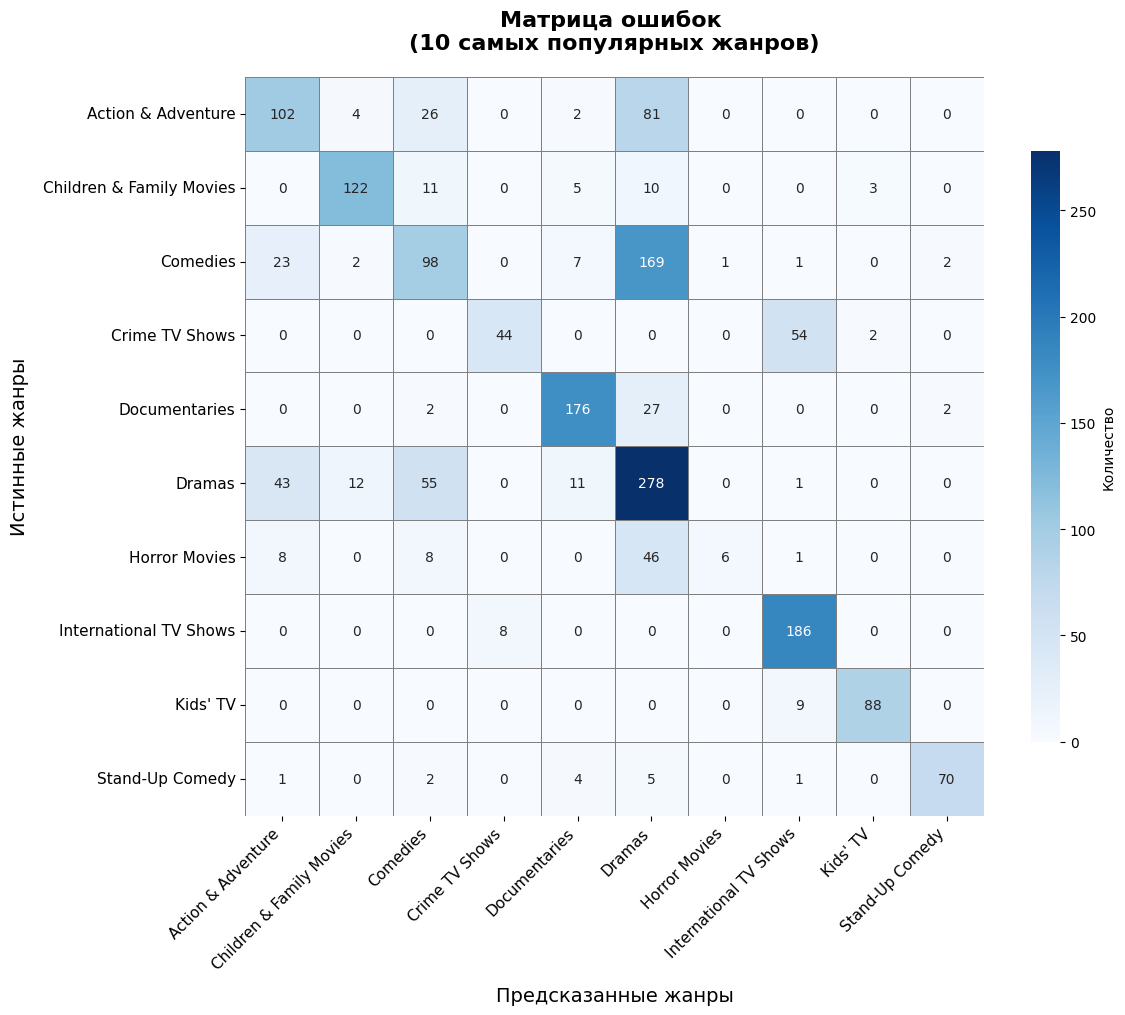

In [159]:
# Создаем матрицу ошибок
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)

# Визуализация матрицы ошибок
plt.figure(figsize=(12, 10))

sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            linewidths=0.5,
            linecolor='gray',
            xticklabels=rf.classes_,
            yticklabels=rf.classes_,
            cbar_kws={'label': 'Количество', 'shrink': 0.8},
            square=True)

plt.title('Матрица ошибок \n(10 самых популярных жанров)',
          fontsize=16,
          fontweight='bold',
          pad=20)

plt.xlabel('Предсказанные жанры', fontsize=14, labelpad=10)
plt.ylabel('Истинные жанры', fontsize=14, labelpad=10)

plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)

plt.tight_layout()
plt.show()

9. Сделать общие выводы

Модель работает, но неидеально. Она хорошо справляется с "чистыми", хорошо отделимыми жанрами (международные сериалы, детские ТВ-шоу), но испытывает трудности с жанрами, которые часто смешиваются в реальности (Драмы, Комедии, Экшн).

Основная задача для улучшения - научиться лучше различать драмы от комедий и экшена. Вероятно, используемых признаков недостаточно для проведения четкой границы.

**ДЗ №7**

Размеры кластеров:
KMeans: [1943  399  148 1630 1334]
DBSCAN: кластеров=0, шум=5454
Agglomerative: [ 310 5110   29    2    3]


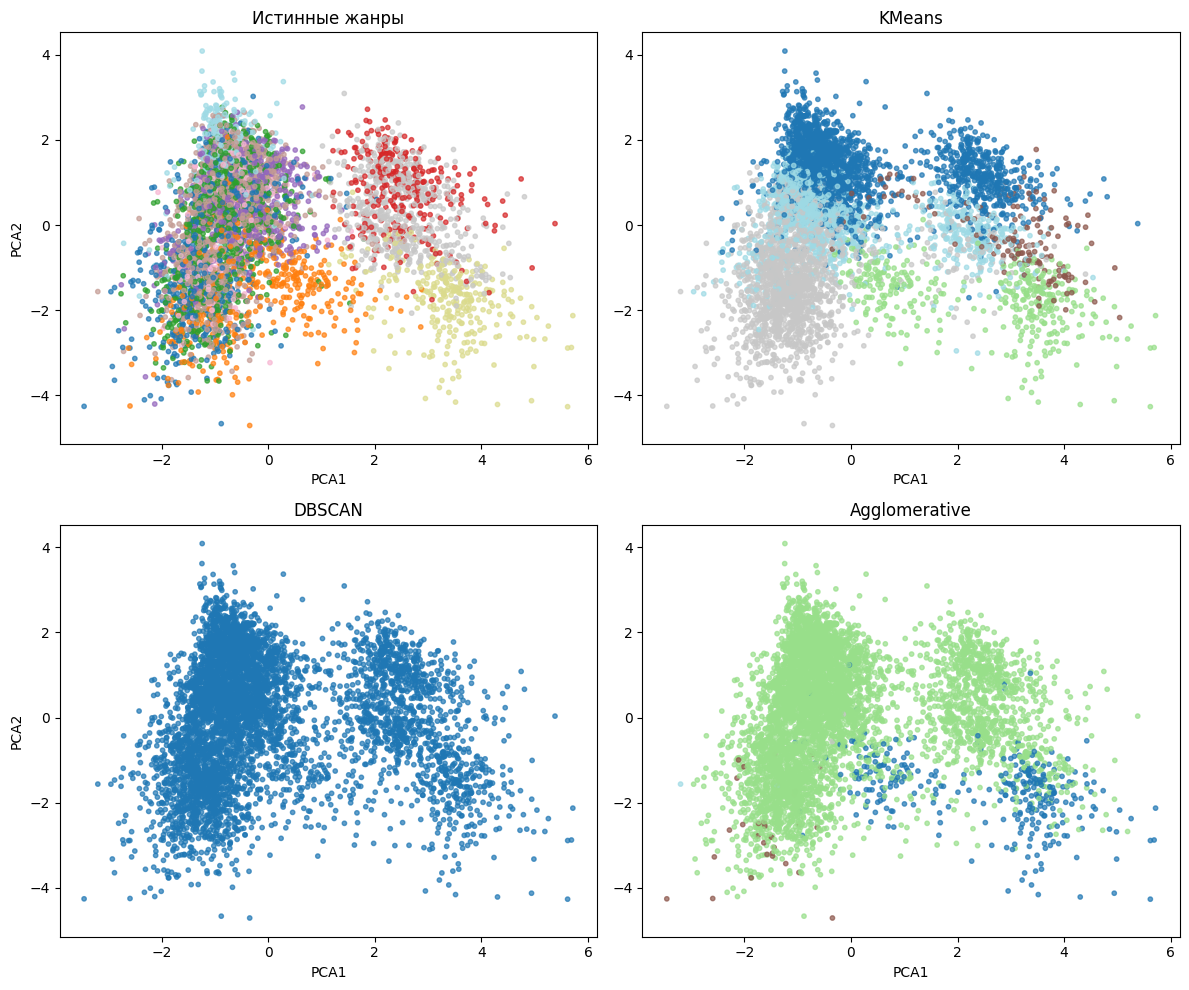


Таблица результатов:
        Метод      ARI      NMI
       KMeans 0.060142 0.180394
       DBSCAN 0.000000 0.000000
Agglomerative 0.025684 0.112094


In [157]:
X_cluster = X_train_full.copy()
if isinstance(X_cluster, pd.DataFrame):
    X_cluster_array = X_cluster.values
else:
    X_cluster_array = X_cluster

# Нормализация
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster_array)


#1. KMeans - метод центроидов
#Задаем 5 кластеров, алгоритм ищет центры кластеров, минимизируя расстояние до точек
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# 2. DBSCAN - плотностная кластеризация
# eps - максимальное расстояние между точками одного кластера, min_samples - минимальное количество точек для образования кластера
# Выделяет области высокой плотности, точки вне них - шум
dbscan = DBSCAN(eps=3.0, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# 3. Agglomerative Clustering - иерархическая кластеризация
# linkage='ward' - метод объединения кластеров, минимизирует дисперсию. Строит дерево кластеров "снизу вверх"
agg = AgglomerativeClustering(n_clusters=5, linkage='ward')
agg_labels = agg.fit_predict(X_scaled)

print("Размеры кластеров:")
print(f"KMeans: {np.bincount(kmeans_labels)}")
print(f"DBSCAN: кластеров={len(set(dbscan_labels))-1}, шум={list(dbscan_labels).count(-1)}")
print(f"Agglomerative: {np.bincount(agg_labels)}")

# РСА - понижение размерности
# Преобразуем данные из множества признаков в 2 главные компоненты. PCA1 и PCA2 объясняют наибольшую долю дисперсии данных. Позволяет визуализировать многомерные данные на плоскости
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_train)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Истинные метки
axes[0,0].scatter(X_pca[:,0], X_pca[:,1], c=y_encoded, cmap='tab20', s=10, alpha=0.7)
axes[0,0].set_title('Истинные жанры')
axes[0,0].set_xlabel('PCA1')
axes[0,0].set_ylabel('PCA2')

# KMeans
axes[0,1].scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels, cmap='tab20', s=10, alpha=0.7)
axes[0,1].set_title('KMeans')
axes[0,1].set_xlabel('PCA1')

# DBSCAN
axes[1,0].scatter(X_pca[:,0], X_pca[:,1], c=dbscan_labels, cmap='tab20', s=10, alpha=0.7)
axes[1,0].set_title('DBSCAN')
axes[1,0].set_xlabel('PCA1')
axes[1,0].set_ylabel('PCA2')

# Agglomerative
axes[1,1].scatter(X_pca[:,0], X_pca[:,1], c=agg_labels, cmap='tab20', s=10, alpha=0.7)
axes[1,1].set_title('Agglomerative')
axes[1,1].set_xlabel('PCA1')

plt.tight_layout()
plt.show()


#Сравнение с истинными метками
results = []
methods = [("KMeans", kmeans_labels), ("DBSCAN", dbscan_labels), ("Agglomerative", agg_labels)]
for name, labels in methods:
    if -1 in labels:
        mask = labels != -1
        if np.sum(mask) > 0:
            ari = adjusted_rand_score(y_encoded[mask], labels[mask])
            nmi = normalized_mutual_info_score(y_encoded[mask], labels[mask])
        else:
            ari = nmi = 0
    else:
        ari = adjusted_rand_score(y_encoded, labels)
        nmi = normalized_mutual_info_score(y_encoded, labels)

    results.append([name, ari, nmi])

# Таблица результатов
results_df = pd.DataFrame(results, columns=['Метод', 'ARI', 'NMI'])
print("\nТаблица результатов:")
print(results_df.to_string(index=False))



Для оценки качества кластеризации использовалось сравнение полученных кластерных меток с истинными жанрами.  
Поскольку номера кластеров не имеют прямого соответствия с классами, применялись специальные метрики для сравнения разбиений - Adjusted Rand Index (ARI) и Normalized Mutual Information (NMI).  
Эти метрики позволяют оценить степень совпадения результатов кластеризации с истинной классификацией без использования целевой метки при обучении. ARI отвечает на вопрос: похоже ли разбиение на кластеры на разбиение на истинные классы? NMI отвечает на вопрос: сколько информации о истинных классах содержится в кластерах?

Алгоритм DBSCAN сильно зависит от выбора своих гиперпараметров, в первую очередь параметров eps и min_samples. Исходные данные имеют высокую размерность, неоднородную плостность. В высокой размерности все состояния становятся похожими, DBSCAN не видит локальных плотных областей, поэтому кластеров нет - все шум. Это корректное поведение алгоритма.

KMeans и Agglomerativeведут себя более предсказуемо. При фиксированном числе кластеров данные методы формируют более устойчивое разбиение пространства признаков.

При сравнении визуализаций можно заметить, что Agglomerativeдаёт более смешанные кластеры, которые сильнее накладываются друг на друга в 2D-проекции PCA. А KMeans формирует более компактные и чётко выраженные группы, что делает результаты визуально и концептуально более понятными.

Финальные выводы:

Для моего датасета DBSCAN работает хуже остальных методов из-за неоднородной плотности данных и высокой размерности признакового пространства.

Agglomerative Clustering показывает приемлемый результат, но кластеры заметно пересекаются.

KMeans оказывается самым устойчивым и интерпретируемым алгоритмом: кластеры более компактны и лучше разделяются в PCA-пространстве. Поэтому KMeans можно считать наиболее подходящим методом кластеризации для рассматриваемого набора данных.